In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline

In [2]:
def oneDBrownian(size):
    """ Function produces values of Brownian motion displacement
    in one dimension
    Parameters:
    ----------
    size : int
           number of interations
    Returns:
    normDis : array
              displacement in x
    """
    normDis = np.random.normal(0, 1, size)
    normDis = np.cumsum(normDis)
    return normDis

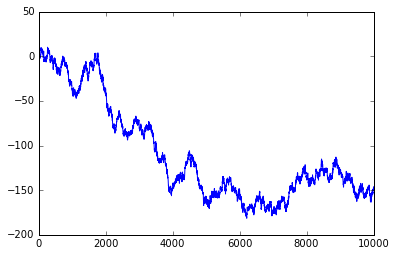

In [3]:
time = np.arange(1, 10000 + 1, 1) #arbitrary time - need to rescale
x_dis = oneDBrownian(len(time))
#fig = plt.figure(figsize=(8, 5))
plt.plot(time, x_dis)

In [4]:
def twoDBrownian(size):
    """ Function produces values of Brownian motion displacement
    in 2 dimension
    Parameters:
    ----------
    size : int
           number of interations
    Returns:
    normDis : array
              displacement in x
    """
    normDisX = np.random.normal(0, 1, size)
    normDisY = np.random.normal(0, 1, size)
    normDisX = np.cumsum(normDisX)
    normDisY = np.cumsum(normDisY)
    return normDisX, normDisY

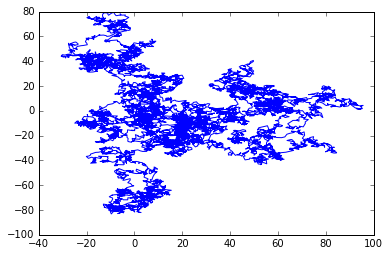

In [5]:
# 2d brownian
xDis, yDis = twoDBrownian(len(time))
#fig = plt.figure(figsize=(8, 5))
plt.plot(xDis, yDis)

In [6]:
def LangevinDiffusion1D(xk, df, h=0.0001):
    """ Langevin Monte Carlo Iterative Method, to solve the
    Langevin Diffusion Stochastic Differential Equation
    Parameters in one dimension
    ----------
    xk : float
         previous position
    df : lamda function
         spatial derivative of 'drift function' of Brownian motion
    h  : float
         tuning parameter, default value set to 0.0001
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    drift = h*df(xk)
    noise = np.sqrt(2*h)*np.random.normal(0, 1)
    x_k1 = xk - drift + noise
    return x_k1  

In [7]:
def MarkovChain1D(xk, num, df):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : float
          initial position
    num : int
          number of iterations
    df  : lamda function, 2x
          spatial derivative of 'drift function' of Brownian motion
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    displacement = [xk]
    for i in range(num - 1):
        xk = LangevinDiffusion1D(xk, df)
        displacement.append(xk)
    return displacement

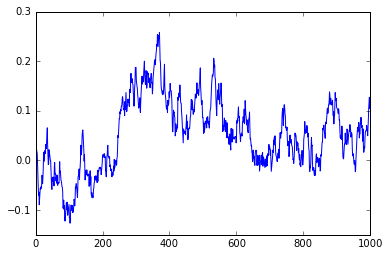

In [8]:
f = lambda xk: xk**2
df = lambda xk: 2.0*xk
displacement = MarkovChain1D(0, 1000, df)
time = np.arange(0, 1000, 1) #length time increment?
plt.plot(time, displacement)

In [9]:
def LangevinDiffusion2D(xk, df, h=0.0001):
    """ Langevin Monte Carlo Iterative Method, to solve the
    Langevin Diffusion Stochastic Differential Equation
    Parameters in one dimension
    ----------
    xk : float
         previous position
    df : lamda function
         spatial derivative of 'drift function' of Brownian motion
    h  : float
         tuning parameter, default value set to 0.0001
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    xk = xk.astype(float)
    drift = np.array([h*df[0](xk[0], xk[1]), h*df[1](xk[0], xk[1])])
    noise = np.array([np.sqrt(2*h)*np.random.normal(0, 1), np.sqrt(2*h)*np.random.normal(0, 1)])
    x_k1 = xk - drift + noise
    return x_k1  

In [10]:
def MarkovChain2D(xk, num, df):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : float
          initial position
    num : int
          number of iterations
    df  : lambda function, 2x
          spatial derivative of 'drift function' of Brownian motion
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    disX = np.array([xk[0]])
    disY = np.array([xk[1]])
    for i in range(0, num - 1, 1):
        xk = LangevinDiffusion2D(xk, df)
        disX = np.append(disX, xk[0])
        disY = np.append(disY, xk[1])
    return disX, disY

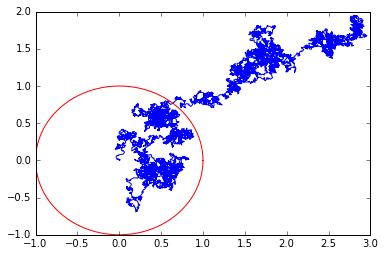

In [11]:
# consider the ball boundary and 2d langevin equation
f = lambda x1, x2: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2: 2.0*x1/(1 - x1**2 - x2**2)
df_x2 = lambda x1, x2: 2.0*x2/(1 - x1**2 - x2**2)
df = np.array([df_x1, df_x2])

initPos = np.array([0,0])
disX, disY = MarkovChain2D(initPos, 10000, df)
plt.plot(disX, disY)

#draw circle
u = np.mgrid[0:2*np.pi:200j]
x=np.cos(u)
y=np.sin(u)
plt.plot(x, y, color="r")

In [12]:
def LangevinDiffusion3D(xk, df, h=0.0001):
    """ Langevin Monte Carlo Iterative Method, to solve the
    Langevin Diffusion Stochastic Differential Equation
    Parameters in one dimension
    ----------
    xk : float
         previous position
    df : lamda function
         spatial derivative of 'drift function' of Brownian motion
    h  : float
         tuning parameter, default value set to 0.0001
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    xk = xk.astype(float)
    x_drift = h*df[0](xk[0], xk[1], xk[2])
    y_drift = h*df[1](xk[0], xk[1], xk[2])
    z_drift = h*df[2](xk[0], xk[1], xk[2])
    drift = np.array([x_drift, y_drift, z_drift])
    x_noise = np.sqrt(2*h)*np.random.normal(0, 1)
    y_noise = np.sqrt(2*h)*np.random.normal(0, 1)
    z_noise = np.sqrt(2*h)*np.random.normal(0, 1)
    noise = np.array([x_noise, y_noise, z_noise])
    x_k1 = xk - drift + noise
    return x_k1  

In [13]:
def MarkovChain3D(xk, num, df):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : float
          initial position
    num : int
          number of iterations
    df  : lamda function, 2x
          spatial derivative of 'drift function' of Brownian motion
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    disX = np.array([xk[0]])
    disY = np.array([xk[1]])
    disZ = np.array([xk[2]])
    for i in range(0, num - 1, 1):
        xk = LangevinDiffusion3D(xk, df)
        disX = np.append(disX, xk[0])
        disY = np.append(disY, xk[1])
        disZ = np.append(disZ, xk[2])
    return disX, disY, disZ

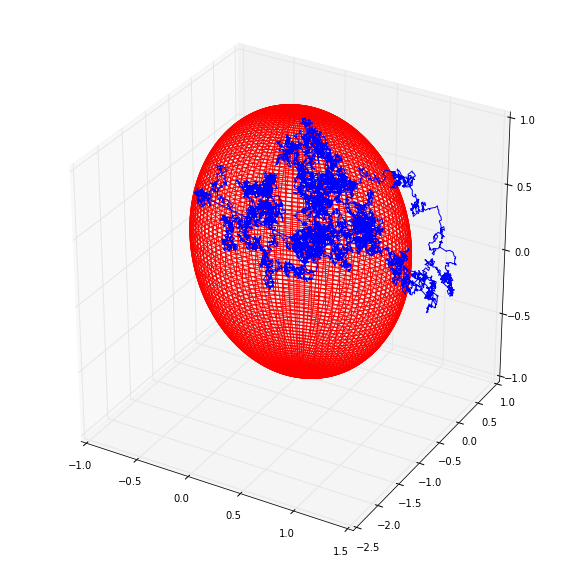

In [14]:
# consider the ball boundary and 3d langevin equation
f = lambda x1, x2, x3: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2, x3: 2.0*x1/(1 - x1**2 - x2**2 - x3**2)
df_x2 = lambda x1, x2, x3: 2.0*x2/(1 - x1**2 - x2**2 - x3**2)
df_x3 = lambda x1, x2, x3: 2.0*x3/(1 - x1**2 - x2**2 - x3**2)
df = np.array([df_x1, df_x2, df_x3])

initPos = np.array([0,0,0])
disX, disY, disZ = MarkovChain3D(initPos, 10000, df)
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot(disX, disY, disZ)

#draw sphere
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

In [ ]:
# By Wedesday 27th April

# Research Dirichlet and Neumann Boundary Conditions
# Hotspots conjecture - heat equation - Burdzy, Werner
# Real time simulation of Brownian Motion and particle?

# having a look at the Metropolis-Hastings algorithm
# The Continuum Limit of a random walk

# Deriving Fokker-Planck Equation from the Langevin
# The Ornstein–Uhlenbeck Process
# Dirichlet and Neumann BC in both above ^^